In [1]:
%matplotlib inline
from __future__ import print_function, division
import sys, os
import json

In [2]:
from shapely.geometry import Polygon
import shapely.wkt
import fiona.crs
import numpy as np
import pandas as pd
import geopandas as gp

In [3]:
import viirstools as vt

In [4]:
ALT1 = False
ALT2 = False 

basedir = '/Volumes/cwdata1/VIIRS/GINA/dds.gina.alaska.edu/NPP/viirs/'
outdir = '/Volumes/SCIENCE_mobile_Mac/Fire/DATA_BY_PROJECT/2015VIIRSMODIS/rasterout/'
if ALT1:
    basedir = '/Volumes/SCIENCE_mobile_Mac/Fire/DATA_BY_PROJECT/2015VIIRSMODIS/VIIRS/'
elif ALT2:
    basedir = '/Volumes/SCIENCE/Fire/DATA_BY_AREA/2015/VIIRS/'

if os.path.isdir(basedir):
    print(basedir, "exists")
else:
    print("Please check directory {}: cannot access it.".format(basedir))

/Volumes/cwdata1/VIIRS/GINA/dds.gina.alaska.edu/NPP/viirs/ exists


In [5]:
granulefn = 'viirsgranulecatalog.json'

In [6]:
with open(os.path.join(basedir, granulefn), 'rU') as src:
    granuledir = json.load(src)

In [7]:
crs = fiona.crs.from_epsg('4326')

In [8]:
granuleDF = pd.DataFrame.from_dict(granuledir, orient='index')
granuleDF = granuleDF.loc[granuleDF['iband_complete']]
granuleDF['geometry'] = granuleDF['edgepolygon_I'].apply(shapely.wkt.loads)

granuleDF = gp.GeoDataFrame(
    granuleDF, 
    crs=crs,
    geometry=granuleDF.geometry)

In [9]:
granuleDF.head()

,GITCO,edgepolygon_I,GMTCO,orbitnumber,ascending_node,SVM16,SVM14,SVM15,SVM12,SVM13,...,SVM06,SVM01,SVM03,SVM02,granuleID,SVM09,SVM08,SVDNB,dir,geometry
20150520_0056130,GITCO_npp_d20150520_t0056130_e0057375_b18439_c...,"POLYGON ((-159.6640625 55.44338607788086, -160...",GMTCO_npp_d20150520_t0056130_e0057375_b18439_c...,18439,True,SVM16_npp_d20150520_t0056130_e0057375_b18439_c...,SVM14_npp_d20150520_t0056130_e0057375_b18439_c...,SVM15_npp_d20150520_t0056130_e0057375_b18439_c...,SVM12_npp_d20150520_t0056130_e0057375_b18439_c...,SVM13_npp_d20150520_t0056130_e0057375_b18439_c...,...,SVM06_npp_d20150520_t0056130_e0057375_b18439_c...,SVM01_npp_d20150520_t0056130_e0057375_b18439_c...,SVM03_npp_d20150520_t0056130_e0057375_b18439_c...,SVM02_npp_d20150520_t0056130_e0057375_b18439_c...,NPP001127553729,SVM09_npp_d20150520_t0056130_e0057375_b18439_c...,SVM08_npp_d20150520_t0056130_e0057375_b18439_c...,SVDNB_npp_d20150520_t0056130_e0057375_b18439_c...,/Volumes/cwdata1/VIIRS/GINA/dds.gina.alaska.ed...,"POLYGON ((-159.6640625 55.44338607788086, -160..."
20150520_0057387,GITCO_npp_d20150520_t0057387_e0059029_b18439_c...,POLYGON ((-159.0609130859375 60.32438659667969...,GMTCO_npp_d20150520_t0057387_e0059029_b18439_c...,18439,True,SVM16_npp_d20150520_t0057387_e0059029_b18439_c...,SVM14_npp_d20150520_t0057387_e0059029_b18439_c...,SVM15_npp_d20150520_t0057387_e0059029_b18439_c...,SVM12_npp_d20150520_t0057387_e0059029_b18439_c...,SVM13_npp_d20150520_t0057387_e0059029_b18439_c...,...,SVM06_npp_d20150520_t0057387_e0059029_b18439_c...,SVM01_npp_d20150520_t0057387_e0059029_b18439_c...,SVM03_npp_d20150520_t0057387_e0059029_b18439_c...,SVM02_npp_d20150520_t0057387_e0059029_b18439_c...,NPP001127554582,SVM09_npp_d20150520_t0057387_e0059029_b18439_c...,SVM08_npp_d20150520_t0057387_e0059029_b18439_c...,SVDNB_npp_d20150520_t0057387_e0059029_b18439_c...,/Volumes/cwdata1/VIIRS/GINA/dds.gina.alaska.ed...,POLYGON ((-159.0609130859375 60.32438659667969...
20150520_0059041,GITCO_npp_d20150520_t0059041_e0100283_b18439_c...,POLYGON ((-157.8484649658203 65.16448974609375...,GMTCO_npp_d20150520_t0059041_e0100283_b18439_c...,18439,True,SVM16_npp_d20150520_t0059041_e0100283_b18439_c...,SVM14_npp_d20150520_t0059041_e0100283_b18439_c...,SVM15_npp_d20150520_t0059041_e0100283_b18439_c...,SVM12_npp_d20150520_t0059041_e0100283_b18439_c...,SVM13_npp_d20150520_t0059041_e0100283_b18439_c...,...,SVM06_npp_d20150520_t0059041_e0100283_b18439_c...,SVM01_npp_d20150520_t0059041_e0100283_b18439_c...,SVM03_npp_d20150520_t0059041_e0100283_b18439_c...,SVM02_npp_d20150520_t0059041_e0100283_b18439_c...,NPP001127555436,SVM09_npp_d20150520_t0059041_e0100283_b18439_c...,SVM08_npp_d20150520_t0059041_e0100283_b18439_c...,SVDNB_npp_d20150520_t0059041_e0100283_b18439_c...,/Volumes/cwdata1/VIIRS/GINA/dds.gina.alaska.ed...,POLYGON ((-157.8484649658203 65.16448974609375...
20150520_0100295,GITCO_npp_d20150520_t0100295_e0101520_b18439_c...,POLYGON ((-155.6382293701172 69.95527648925781...,GMTCO_npp_d20150520_t0100295_e0101520_b18439_c...,18439,True,SVM16_npp_d20150520_t0100295_e0101520_b18439_c...,SVM14_npp_d20150520_t0100295_e0101520_b18439_c...,SVM15_npp_d20150520_t0100295_e0101520_b18439_c...,SVM12_npp_d20150520_t0100295_e0101520_b18439_c...,SVM13_npp_d20150520_t0100295_e0101520_b18439_c...,...,SVM06_npp_d20150520_t0100295_e0101520_b18439_c...,SVM01_npp_d20150520_t0100295_e0101520_b18439_c...,SVM03_npp_d20150520_t0100295_e0101520_b18439_c...,SVM02_npp_d20150520_t0100295_e0101520_b18439_c...,NPP001127556289,SVM09_npp_d20150520_t0100295_e0101520_b18439_c...,SVM08_npp_d20150520_t0100295_e0101520_b18439_c...,SVDNB_npp_d20150520_t0100295_e0101520_b18439_c...,/Volumes/cwdata1/VIIRS/GINA/dds.gina.alaska.ed...,POLYGON ((-155.6382293701172 69.95527648925781...
20150520_0938154,GITCO_npp_d20150520_t0938154_e0939397_b18444_c...,POLYGON ((-141.5119476318359 72.90977478027344...,GMTCO_npp_d20150520_t0938154_e0939397_b18444_c...,18444,False,SVM16_npp_d20150520_t0938154_e0939397_b18444_c...,SVM14_npp_d20150520_t0

In [10]:
granuleDF.shape

(5990, 34)

In [11]:
roi = gp.GeoDataFrame.from_file('BorealAKForUAFSmoke.json')

In [12]:
roi.to_crs(epsg=3338)

,Description,Name,geometry
0,,Boreal AK and adjacent CA,POLYGON Z ((-489871.7512836116 2163990.0433947...


In [13]:
borealroifootprint = roi.to_crs(epsg=3338)['geometry'][0]
granuleDF = granuleDF.to_crs(epsg=3338)

In [14]:
borealroifootprint.area

1753495804220.8188

In [15]:
granuleDF['borealoverlap'] = granuleDF['geometry'].apply(lambda x: borealroifootprint.intersection(x).area/borealroifootprint.area)

If we want to archive the ones with overlap < 1 % of the boreal forets region of interest. 

In [16]:
granuleDF['archived'] = granuleDF['borealoverlap'].apply(lambda x: x < 0.01)

In [17]:
granuleDF.head(20)

,GITCO,edgepolygon_I,GMTCO,orbitnumber,ascending_node,SVM16,SVM14,SVM15,SVM12,SVM13,...,SVM03,SVM02,granuleID,SVM09,SVM08,SVDNB,dir,geometry,borealoverlap,archived
20150520_0056130,GITCO_npp_d20150520_t0056130_e0057375_b18439_c...,"POLYGON ((-159.6640625 55.44338607788086, -160...",GMTCO_npp_d20150520_t0056130_e0057375_b18439_c...,18439,True,SVM16_npp_d20150520_t0056130_e0057375_b18439_c...,SVM14_npp_d20150520_t0056130_e0057375_b18439_c...,SVM15_npp_d20150520_t0056130_e0057375_b18439_c...,SVM12_npp_d20150520_t0056130_e0057375_b18439_c...,SVM13_npp_d20150520_t0056130_e0057375_b18439_c...,...,SVM03_npp_d20150520_t0056130_e0057375_b18439_c...,SVM02_npp_d20150520_t0056130_e0057375_b18439_c...,NPP001127553729,SVM09_npp_d20150520_t0056130_e0057375_b18439_c...,SVM08_npp_d20150520_t0056130_e0057375_b18439_c...,SVDNB_npp_d20150520_t0056130_e0057375_b18439_c...,/Volumes/cwdata1/VIIRS/GINA/dds.gina.alaska.ed...,POLYGON ((-357821.4633565799 618757.1877454454...,0.037822,False
20150520_0057387,GITCO_npp_d20150520_t0057387_e0059029_b18439_c...,POLYGON ((-159.0609130859375 60.32438659667969...,GMTCO_npp_d20150520_t0057387_e0059029_b18439_c...,18439,True,SVM16_npp_d20150520_t0057387_e0059029_b18439_c...,SVM14_npp_d20150520_t0057387_e0059029_b18439_c...,SVM15_npp_d20150520_t0057387_e0059029_b18439_c...,SVM12_npp_d20150520_t0057387_e0059029_b18439_c...,SVM13_npp_d20150520_t0057387_e0059029_b18439_c...,...,SVM03_npp_d20150520_t0057387_e0059029_b18439_c...,SVM02_npp_d20150520_t0057387_e0059029_b18439_c...,NPP001127554582,SVM09_npp_d20150520_t0057387_e0059029_b18439_c...,SVM08_npp_d20150520_t0057387_e0059029_b18439_c...,SVDNB_npp_d20150520_t0057387_e0059029_b18439_c...,/Volumes/cwdata1/VIIRS/GINA/dds.gina.alaska.ed...,"POLYGON ((-278298.094465842 1159179.406669677,...",0.107123,False
20150520_0059041,GITCO_npp_d20150520_t0059041_e0100283_b18439_c...,POLYGON ((-157.8484649658203 65.16448974609375...,GMTCO_npp_d20150520_t0059041_e0100283_b18439_c...,18439,True,SVM16_npp_d20150520_t0059041_e0100283_b18439_c...,SVM14_npp_d20150520_t0059041_e0100283_b18439_c...,SVM15_npp_d20150520_t0059041_e0100283_b18439_c...,SVM12_npp_d20150520_t0059041_e0100283_b18439_c...,SVM13_npp_d20150520_t0059041_e0100283_b18439_c...,...,SVM03_npp_d20150520_t0059041_e0100283_b18439_c...,SVM02_npp_d20150520_t0059041_e0100283_b18439_c...,NPP001127555436,SVM09_npp_d20150520_t0059041_e0100283_b18439_c...,SVM08_npp_d20150520_t0059041_e0100283_b18439_c...,SVDNB_npp_d20150520_t0059041_e0100283_b18439_c...,/Volumes/cwdata1/VIIRS/GINA/dds.gina.alaska.ed...,POLYGON ((-180389.7729645866 1694619.602629911...,0.077008,False
20150520_0100295,GITCO_npp_d20150520_t0100295_e0101520_b18439_c...,POLYGON ((-155.6382293701172 69.95527648925781...,GMTCO_npp_d20150520_t0100295_e0101520_b18439_c...,18439,True,SVM16_npp_d20150520_t0100295_e0101520_b18439_c...,SVM14_npp_d20150520_t0100295_e0101520_b18439_c...,SVM15_npp_d20150520_t0100295_e0101520_b18439_c...,SVM12_npp_d20150520_t0100295_e0101520_b18439_c...,SVM13_npp_d20150520_t0100295_e0101520_b18439_c...,...,SVM03_npp_d20150520_t0100295_e0101520_b18439_c...,SVM02_npp_d20150520_t0100295_e0101520_b18439_c...,NPP001127556289,SVM09_npp_d20150520_t0100295_e0101520_b18439_c...,SVM08_npp_d20150520_t0100295_e0101520_b18439_c...,SVDNB_npp_d20150520_t0100295_e0101520_b18439_c...,/Volumes/cwdata1/VIIRS/GINA/dds.gina.alaska.ed...,POLYGON ((-63738.34525569761 2220710.492069298...,0.000000,True
20150520_0938154,GITCO_npp_d20150520_t0938154_e0939397_b18444_c...,POLYGON ((-141.5119476318359 72.90977478027344...,GMTCO_npp_d20150520_t0938154_e0939397_b18444_c...,18444,False,SVM16_npp_d20150520_t0938154_e0939397_b18444_c...,SVM14_npp_d20150520_t0938154_e0939397_b18444_c...,SVM15_npp_d20150520_t0938154_e0939397_b18444_c...,SVM12_npp_d20150520_t0938154_e0939397_b18444_c...,SVM13_npp_d20150520_t0938154_e0939397_b18444_c...,...,SVM03_npp_d20150520_t0938154_e0939397_b18444_c...,SVM02_npp_d20150520_t0938154_e0939397_b18444_c...,NPP001127866963,SVM09_npp_d20150520_t0938154_e09

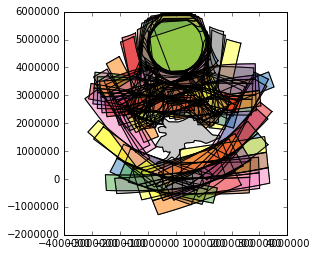

In [19]:
granuleDF[granuleDF['borealoverlap'] < 0.01].head(100)['geometry'].plot()
roi.to_crs(epsg=3338)['geometry'].plot()

In [20]:
datasettypes = [u'GITCO',
    u'GMTCO',
    u'SVM16',
    u'SVM14',
    u'SVM15',
    u'SVM12',
    u'SVM13',
    u'SVM10',
    u'SVM11',
    u'SVI01',
    u'SVI03',
    u'SVI02',
    u'SVI05',
    u'SVI04',
    u'GDNBO',
    u'SVM05',
    u'SVM04',
    u'SVM07',
    u'SVM06',
    u'SVM01',
    u'SVM03',
    u'SVM02',
    u'SVM09',
    u'SVM08',
    u'SVDNB']
datasettypes.sort()
print(len(datasettypes))

25


In [45]:
counter = 0
with open(os.path.join(basedir, 'viirsfilesfordeletion.txt'), 'w') as dest:
    for idx, row in granuleDF[granuleDF['borealoverlap'] < 0.01].iterrows():
        for colname in datasettypes:
            if row[colname]:
                try:
                # catching issues with NaN written in empty string slots
                    dest.write(os.path.join(row['dir'], row[colname]) + '\n')
                    counter += 1
                except AttributeError:
                    pass
print("Files marked for deletion: {}.".format(counter))

Files marked for deletion: 5573.


In [21]:
granuleDF['archived'].value_counts()

False    3223
True     2767
Name: archived, dtype: int64

In [22]:
granuleDF.drop(['geometry'], axis=1, inplace=True)

In [23]:
granuleDF.head()

,GITCO,edgepolygon_I,GMTCO,orbitnumber,ascending_node,SVM16,SVM14,SVM15,SVM12,SVM13,...,SVM01,SVM03,SVM02,granuleID,SVM09,SVM08,SVDNB,dir,borealoverlap,archived
20150520_0056130,GITCO_npp_d20150520_t0056130_e0057375_b18439_c...,"POLYGON ((-159.6640625 55.44338607788086, -160...",GMTCO_npp_d20150520_t0056130_e0057375_b18439_c...,18439,True,SVM16_npp_d20150520_t0056130_e0057375_b18439_c...,SVM14_npp_d20150520_t0056130_e0057375_b18439_c...,SVM15_npp_d20150520_t0056130_e0057375_b18439_c...,SVM12_npp_d20150520_t0056130_e0057375_b18439_c...,SVM13_npp_d20150520_t0056130_e0057375_b18439_c...,...,SVM01_npp_d20150520_t0056130_e0057375_b18439_c...,SVM03_npp_d20150520_t0056130_e0057375_b18439_c...,SVM02_npp_d20150520_t0056130_e0057375_b18439_c...,NPP001127553729,SVM09_npp_d20150520_t0056130_e0057375_b18439_c...,SVM08_npp_d20150520_t0056130_e0057375_b18439_c...,SVDNB_npp_d20150520_t0056130_e0057375_b18439_c...,/Volumes/cwdata1/VIIRS/GINA/dds.gina.alaska.ed...,0.037822,False
20150520_0057387,GITCO_npp_d20150520_t0057387_e0059029_b18439_c...,POLYGON ((-159.0609130859375 60.32438659667969...,GMTCO_npp_d20150520_t0057387_e0059029_b18439_c...,18439,True,SVM16_npp_d20150520_t0057387_e0059029_b18439_c...,SVM14_npp_d20150520_t0057387_e0059029_b18439_c...,SVM15_npp_d20150520_t0057387_e0059029_b18439_c...,SVM12_npp_d20150520_t0057387_e0059029_b18439_c...,SVM13_npp_d20150520_t0057387_e0059029_b18439_c...,...,SVM01_npp_d20150520_t0057387_e0059029_b18439_c...,SVM03_npp_d20150520_t0057387_e0059029_b18439_c...,SVM02_npp_d20150520_t0057387_e0059029_b18439_c...,NPP001127554582,SVM09_npp_d20150520_t0057387_e0059029_b18439_c...,SVM08_npp_d20150520_t0057387_e0059029_b18439_c...,SVDNB_npp_d20150520_t0057387_e0059029_b18439_c...,/Volumes/cwdata1/VIIRS/GINA/dds.gina.alaska.ed...,0.107123,False
20150520_0059041,GITCO_npp_d20150520_t0059041_e0100283_b18439_c...,POLYGON ((-157.8484649658203 65.16448974609375...,GMTCO_npp_d20150520_t0059041_e0100283_b18439_c...,18439,True,SVM16_npp_d20150520_t0059041_e0100283_b18439_c...,SVM14_npp_d20150520_t0059041_e0100283_b18439_c...,SVM15_npp_d20150520_t0059041_e0100283_b18439_c...,SVM12_npp_d20150520_t0059041_e0100283_b18439_c...,SVM13_npp_d20150520_t0059041_e0100283_b18439_c...,...,SVM01_npp_d20150520_t0059041_e0100283_b18439_c...,SVM03_npp_d20150520_t0059041_e0100283_b18439_c...,SVM02_npp_d20150520_t0059041_e0100283_b18439_c...,NPP001127555436,SVM09_npp_d20150520_t0059041_e0100283_b18439_c...,SVM08_npp_d20150520_t0059041_e0100283_b18439_c...,SVDNB_npp_d20150520_t0059041_e0100283_b18439_c...,/Volumes/cwdata1/VIIRS/GINA/dds.gina.alaska.ed...,0.077008,False
20150520_0100295,GITCO_npp_d20150520_t0100295_e0101520_b18439_c...,POLYGON ((-155.6382293701172 69.95527648925781...,GMTCO_npp_d20150520_t0100295_e0101520_b18439_c...,18439,True,SVM16_npp_d20150520_t0100295_e0101520_b18439_c...,SVM14_npp_d20150520_t0100295_e0101520_b18439_c...,SVM15_npp_d20150520_t0100295_e0101520_b18439_c...,SVM12_npp_d20150520_t0100295_e0101520_b18439_c...,SVM13_npp_d20150520_t0100295_e0101520_b18439_c...,...,SVM01_npp_d20150520_t0100295_e0101520_b18439_c...,SVM03_npp_d20150520_t0100295_e0101520_b18439_c...,SVM02_npp_d20150520_t0100295_e0101520_b18439_c...,NPP001127556289,SVM09_npp_d20150520_t0100295_e0101520_b18439_c...,SVM08_npp_d20150520_t0100295_e0101520_b18439_c...,SVDNB_npp_d20150520_t0100295_e0101520_b18439_c...,/Volumes/cwdata1/VIIRS/GINA/dds.gina.alaska.ed...,0.000000,True
20150520_0938154,GITCO_npp_d20150520_t0938154_e0939397_b18444_c...,POLYGON ((-141.5119476318359 72.90977478027344...,GMTCO_npp_d20150520_t0938154_e0939397_b18444_c...,18444,False,SVM16_npp_d20150520_t0938154_e0939397_b18444_c...,SVM14_npp_d20150520_t0938154_e0939397_b18444_c...,SVM15_npp_d20150520_t0938154_e0939397_b18444_c...,SVM12_npp_d20150520_t0938154_e0939397_b18444_c...,SVM13_npp_d20150520_t0938154_e0939397_b18444_c...,...,SVM01_npp_d20150520_t0938154_e0939397_b18444_c...,SVM03_npp_d20150520_t0938154_e0939397_b18444_c...,SVM02_npp_d20150520_t0938154_e0939397_b18444_c...,NPP

In [24]:
granule_dict = pd.DataFrame(granuleDF).to_dict(orient='index')

In [25]:
with open(os.path.join(basedir, 'viirsgranulecatalog_post_archive.json'), 'w') as dest:
    dest.write(json.dumps(granule_dict, indent=2))

In [26]:
goodgranule_dict = pd.DataFrame(granuleDF[~granuleDF['archived']]).to_dict(orient='index')

In [27]:
with open(os.path.join(basedir, 'viirsgranulecatalog_in_ROI.json'), 'w') as dest:
    dest.write(json.dumps(goodgranule_dict, indent=2))

In [28]:
pd.__version__

u'0.18.1'